# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [69]:
# Let's start by importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
import math

# We can read from an online URL
insCompany_data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

insCompany_data.head()


Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   Vehicle Class  Total Claim Amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [70]:
# Column names should be in lower case

insCompany_data.columns = insCompany_data.columns.str.lower()  # Convert to lowercase
insCompany_data.head()


customer          st gender             education customer lifetime value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    income  monthly premium auto number of open complaints     policy type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   vehicle class  total claim amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [71]:
#White spaces in column names should be replaced by _

insCompany_data.columns = insCompany_data.columns.str.replace(' ', '_') 
insCompany_data.head()

customer          st gender             education customer_lifetime_value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    income  monthly_premium_auto number_of_open_complaints     policy_type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [72]:
#st could be replaced by state

insCompany_data = insCompany_data.rename(columns={'st':'state'})
insCompany_data.head(20)


customer       state gender             education customer_lifetime_value  \
0   RB50392  Washington    NaN                Master                     NaN   
1   QZ44356     Arizona      F              Bachelor              697953.59%   
2   AI49188      Nevada      F              Bachelor             1288743.17%   
3   WW63253  California      M              Bachelor              764586.18%   
4   GA49547  Washington      M  High School or Below              536307.65%   
5   OC83172      Oregon      F              Bachelor              825629.78%   
6   XZ87318      Oregon      F               College              538089.86%   
7   CF85061     Arizona      M                Master              721610.03%   
8   DY87989      Oregon      M              Bachelor             2412750.40%   
9   BQ94931      Oregon      F               College              738817.81%   
10  SX51350  California      M               College              473899.20%   
11  VQ65197  California    NaN               College              819719.71%   
12  DP39365  California    NaN                Master              879879.70%   
13  SJ95423     Arizona    NaN  High School or Below              881901.89%   
14  IL66569  California    NaN               College              538443.17%   
15  BW63560      Oregon    NaN              Bachelor              746313.94%   
16  FV94802      Nevada    NaN  High School or Below              256686.78%   
17  OE15005        Cali    NaN               College              394524.16%   
18  WC83389      Oregon    NaN               College              571033.31%   
19  FL50705  California    NaN  High School or Below              816261.71%   

     income  monthly_premium_auto number_of_open_complaints     policy_type  \
0       0.0                1000.0                    1/0/00   Personal Auto   
1       0.0                  94.0                    1/0/00   Personal Auto   
2   48767.0                 108.0                    1/0/00   Personal Auto   
3       0.0                 106.0                    1/0/00  Corporate Auto   
4   36357.0                  68.0                    1/0/00   Personal Auto   
5   62902.0                  69.0                    1/0/00   Personal Auto   
6   55350.0                  67.0                    1/0/00  Corporate Auto   
7       0.0                 101.0                    1/0/00  Corporate Auto   
8   14072.0                  71.0                    1/0/00  Corporate Auto   
9   28812.0                  93.0                    1/0/00    Special Auto   
10      0.0                  67.0                    1/0/00   Personal Auto   
11      0.0                 110.0                    1/0/00   Personal Auto   
12  77026.0                 110.0                    1/2/00  Corporate Auto   
13  99845.0                 110.0                    1/1/00  Corporate Auto   
14  83689.0                  70.0                    1/2/00  Corporate Auto   
15  24599.0                  64.0                    1/1/00  Corporate Auto   
16  25049.0                  67.0                    1/0/00   Personal Auto   
17  28855.0                 101.0                    1/0/00   Personal Auto   
18  51148.0                  72.0                    1/0/00   Personal Auto   
19  66140.0                 101.0                    1/0/00  Corporate Auto   

    vehicle_class  total_claim_amount  
0   Four-Door Car            2.704934  
1   Four-Door Car         1131.464935  
2    Two-Door Car          566.472247  
3             SUV          529.881344  
4   Four-Door Car           17.269323  
5    Two-Door Car          159.383042  
6   Four-Door Car          321.600000  
7   Four-Door Car          363.029680  
8   Four-Door Car          511.200000  
9   Four-Door Car          425.527834  
10  Four-Door Car          482.400000  
11            SUV          528.000000  
12  Four-Door Car          472.029737  
13            SUV          528.000000  
14  Four-Door Car          307.139132  
15  Four-Door Car     

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [73]:
#"F", "M", "Femal", "Male", "female", needs to be standardized

def cleanGender(x):
    if x in ['M', 'MALE']:
        return 'M'
    elif x in ['F', 'Femal', 'female']:
        return 'F'
    else:
        return 'F'
insCompany_data['gender'] = list(map(cleanGender, insCompany_data['gender']))

insCompany_data['gender'].value_counts()



gender
F    3595
M     413
Name: count, dtype: int64

In [74]:
# State abbreviations can be replaced

insCompany_data['state'] = insCompany_data['state'].replace({
    'Cali': 'California',
    'AZ': 'Arizona',
    'WA': 'Washington',
})
insCompany_data.head()

customer       state gender             education customer_lifetime_value  \
0  RB50392  Washington      F                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    income  monthly_premium_auto number_of_open_complaints     policy_type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [75]:
# In education, "Bachelors" could be replaced by "Bachelor"

insCompany_data['education'].value_counts(dropna=False)

insCompany_data['education']= list(map(lambda x : str(x).replace('Bachelors','Bachelor'),insCompany_data['education']))
insCompany_data.head(10)

customer       state gender             education customer_lifetime_value  \
0  RB50392  Washington      F                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   
5  OC83172      Oregon      F              Bachelor              825629.78%   
6  XZ87318      Oregon      F               College              538089.86%   
7  CF85061     Arizona      M                Master              721610.03%   
8  DY87989      Oregon      M              Bachelor             2412750.40%   
9  BQ94931      Oregon      F               College              738817.81%   

    income  monthly_premium_auto number_of_open_complaints     policy_type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   
5  62902.0                  69.0                    1/0/00   Personal Auto   
6  55350.0                  67.0                    1/0/00  Corporate Auto   
7      0.0                 101.0                    1/0/00  Corporate Auto   
8  14072.0                  71.0                    1/0/00  Corporate Auto   
9  28812.0                  93.0                    1/0/00    Special Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323  
5   Two-Door Car          159.383042  
6  Four-Door Car          321.600000  
7  Four-Door Car          363.029680  
8  Four-Door Car          511.200000  
9  Four-Door Car          425.527834

In [76]:
#In Customer Lifetime Value, delete the `%` character

insCompany_data['customer_lifetime_value'].value_counts(dropna=False)
insCompany_data['customer_lifetime_value']=insCompany_data['customer_lifetime_value'].fillna("0")
insCompany_data['customer_lifetime_value']=list(map(lambda x: x.replace('%', ''),insCompany_data['customer_lifetime_value']))
insCompany_data['customer_lifetime_value']


0                0
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003             0
4004             0
4005             0
4006             0
4007             0
Name: customer_lifetime_value, Length: 4008, dtype: object

In [77]:
# Replace specific values in the 'vehicle_class' column with "Luxury"
insCompany_data['vehicle_class'] = insCompany_data['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury')
insCompany_data.head()

customer       state gender             education customer_lifetime_value  \
0  RB50392  Washington      F                Master                       0   
1  QZ44356     Arizona      F              Bachelor               697953.59   
2  AI49188      Nevada      F              Bachelor              1288743.17   
3  WW63253  California      M              Bachelor               764586.18   
4  GA49547  Washington      M  High School or Below               536307.65   

    income  monthly_premium_auto number_of_open_complaints     policy_type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [78]:
# Your code here
#determines all the columns datatypes
insCompany_data.dtypes

# Convert a column to numeric
insCompany_data['customer_lifetime_value'] = pd.to_numeric(insCompany_data['customer_lifetime_value'], errors='coerce')


print(insCompany_data['customer_lifetime_value'])


# Display unique values in the 'Number of Open Complaints' column
unique_values = insCompany_data['number_of_open_complaints'].unique()
print(unique_values)


0             0.00
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003          0.00
4004          0.00
4005          0.00
4006          0.00
4007          0.00
Name: customer_lifetime_value, Length: 4008, dtype: float64
['1/0/00' '1/2/00' '1/1/00' '1/3/00' '1/5/00' '1/4/00' nan]


In [79]:
#cleaning Number of open complaints columns

insCompany_data['number_of_open_complaints'].value_counts(dropna=False)

number_of_open_complaints
NaN       2937
1/0/00     830
1/1/00     138
1/2/00      50
1/3/00      34
1/4/00      13
1/5/00       6
Name: count, dtype: int64

In [80]:
#using the fillna("0/0"), to substitute the NaN value with the string "0/0" in the column 

insCompany_data['number_of_open_complaints']=insCompany_data['number_of_open_complaints'].fillna("0/0")



In [81]:
#using the function string.split('/'), to substitute the / sign 

insCompany_data['number_of_open_complaints'] = list(map(lambda el: el.split('/')[1], insCompany_data['number_of_open_complaints']))
insCompany_data['number_of_open_complaints'] = pd.to_numeric(insCompany_data['number_of_open_complaints'], errors='coerce')

insCompany_data['number_of_open_complaints'].value_counts(dropna=False)

number_of_open_complaints
0    3767
1     138
2      50
3      34
4      13
5       6
Name: count, dtype: int64

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [82]:
# Your code here
# Drop rows with null values
insCompany_data.dropna(axis=0, inplace=True)



# Drop columns with null values
insCompany_data.dropna(axis=1, inplace=True)

insCompany_data.isnull().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [83]:
# Find numeric columns
numeric_cols = insCompany_data._get_numeric_data() 
numeric_cols


customer_lifetime_value   income  monthly_premium_auto  \
0                        0.00      0.0                1000.0   
1                   697953.59      0.0                  94.0   
2                  1288743.17  48767.0                 108.0   
3                   764586.18      0.0                 106.0   
4                   536307.65  36357.0                  68.0   
...                       ...      ...                   ...   
1066                305955.03  38644.0                  78.0   
1067               2031499.76  63209.0                 102.0   
1068                323912.47  16061.0                  88.0   
1069                462680.11  79487.0                 114.0   
1070                899704.02  54230.0                 112.0   

      number_of_open_complaints  total_claim_amount  
0                             0            2.704934  
1                             0         1131.464935  
2                             0          566.472247  
3                             0          529.881344  
4                             0           17.269323  
...                         ...                 ...  
1066                          1          361.455219  
1067                          2          207.320041  
1068                          0          633.600000  
1069                          0          547.200000  
1070                          0          537.600000  

[1071 rows x 5 columns]

In [84]:
# Fill null values with mean for numerical variables

for col in numeric_cols:
    insCompany_data[col].fillna(insCompany_data[col].mean(), inplace=True)
    
# Fill null values with mode for categorical variables
categorical_cols = insCompany_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = insCompany_data[col].mode()[0] 
    insCompany_data[col].fillna(mode_val, inplace=True)

insCompany_data.head()

customer       state gender             education  customer_lifetime_value  \
0  RB50392  Washington      F                Master                     0.00   
1  QZ44356     Arizona      F              Bachelor                697953.59   
2  AI49188      Nevada      F              Bachelor               1288743.17   
3  WW63253  California      M              Bachelor                764586.18   
4  GA49547  Washington      M  High School or Below                536307.65   

    income  monthly_premium_auto  number_of_open_complaints     policy_type  \
0      0.0                1000.0                          0   Personal Auto   
1      0.0                  94.0                          0   Personal Auto   
2  48767.0                 108.0                          0   Personal Auto   
3      0.0                 106.0                          0  Corporate Auto   
4  36357.0                  68.0                          0   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [85]:
# Drop all duplicate rows


insCompany_data.drop_duplicates(keep=False,inplace=True)

insCompany_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1066    False
1067    False
1068    False
1069    False
1070    False
Length: 1071, dtype: bool

In [86]:

# Keep only the first occurrence of each duplicated row
data_no_duplicates = insCompany_data.drop_duplicates(keep='first')



In [87]:
# Keep only the last occurrence of each duplicated row
data_no_duplicates = insCompany_data.drop_duplicates(keep='last')
print("Data after keeping only the last occurrence of duplicates:")
data_no_duplicates.head()

Data after keeping only the last occurrence of duplicates:


customer       state gender             education  customer_lifetime_value  \
0  RB50392  Washington      F                Master                     0.00   
1  QZ44356     Arizona      F              Bachelor                697953.59   
2  AI49188      Nevada      F              Bachelor               1288743.17   
3  WW63253  California      M              Bachelor                764586.18   
4  GA49547  Washington      M  High School or Below                536307.65   

    income  monthly_premium_auto  number_of_open_complaints     policy_type  \
0      0.0                1000.0                          0   Personal Auto   
1      0.0                  94.0                          0   Personal Auto   
2  48767.0                 108.0                          0   Personal Auto   
3      0.0                 106.0                          0  Corporate Auto   
4  36357.0                  68.0                          0   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [88]:
#duplicated row based on subset of columns state and education

data_no_duplicates = insCompany_data.drop_duplicates(subset=['state', 'education'])
print("Data after dropping duplicates based on subset of columns state and education:")
print(data_no_duplicates)

Data after dropping duplicates based on subset of columns state and education:
    customer       state gender             education  \
0    RB50392  Washington      F                Master   
1    QZ44356     Arizona      F              Bachelor   
2    AI49188      Nevada      F              Bachelor   
3    WW63253  California      M              Bachelor   
4    GA49547  Washington      M  High School or Below   
5    OC83172      Oregon      F              Bachelor   
6    XZ87318      Oregon      F               College   
7    CF85061     Arizona      M                Master   
10   SX51350  California      M               College   
12   DP39365  California      F                Master   
13   SJ95423     Arizona      F  High School or Below   
16   FV94802      Nevada      F  High School or Below   
19   FL50705  California      F  High School or Below   
20   ZK25313      Oregon      F  High School or Below   
21   QK46697  Washington      M              Bachelor   
27   HS14

In [89]:
#duplicated row based on column A

data_no_duplicates = insCompany_data.drop_duplicates(subset=['state'])
print("Data after dropping duplicates based on column A:")
data_no_duplicates

Data after dropping duplicates based on column A:


customer       state gender education  customer_lifetime_value   income  \
0  RB50392  Washington      F    Master                     0.00      0.0   
1  QZ44356     Arizona      F  Bachelor                697953.59      0.0   
2  AI49188      Nevada      F  Bachelor               1288743.17  48767.0   
3  WW63253  California      M  Bachelor                764586.18      0.0   
5  OC83172      Oregon      F  Bachelor                825629.78  62902.0   

   monthly_premium_auto  number_of_open_complaints     policy_type  \
0                1000.0                          0   Personal Auto   
1                  94.0                          0   Personal Auto   
2                 108.0                          0   Personal Auto   
3                 106.0                          0  Corporate Auto   
5                  69.0                          0   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
5   Two-Door Car          159.383042

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [90]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [91]:
# Your code here

In [92]:
#LAB2 for DAY3
insCompany_data

customer       state gender             education  \
0     RB50392  Washington      F                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
1066  TM65736      Oregon      M                Master   
1067  VJ51327  California      F  High School or Below   
1068  GS98873     Arizona      F              Bachelor   
1069  CW49887  California      F                Master   
1070  MY31220  California      F               College   

      customer_lifetime_value   income  monthly_premium_auto  \
0                        0.00      0.0                1000.0   
1                   697953.59      0.0                  94.0   
2                  1288743.17  48767.0                 108.0   
3                   764586.18      0.0                 106.0   
4                   536307.65  36357.0                  68.0   
...                       ...      ...                   ...   
1066                305955.03  38644.0                  78.0   
1067               2031499.76  63209.0                 102.0   
1068                323912.47  16061.0                  88.0   
1069                462680.11  79487.0                 114.0   
1070                899704.02  54230.0                 112.0   

      number_of_open_complaints     policy_type  vehicle_class  \
0                             0   Personal Auto  Four-Door Car   
1                             0   Personal Auto  Four-Door Car   
2                             0   Personal Auto   Two-Door Car   
3                             0  Corporate Auto            SUV   
4                             0   Personal Auto  Four-Door Car   
...                         ...             ...            ...   
1066                          1   Personal Auto  Four-Door Car   
1067                          2   Personal Auto            SUV   
1068                          0   Personal Auto  Four-Door Car   
1069                          0    Special Auto            SUV   
1070                          0   Personal Auto   Two-Door Car   

      total_claim_amount  
0               2.704934  
1            1131.464935  
2             566.472247  
3             529.881344  
4              17.269323  
...                  ...  
1066          361.455219  
1067          207.320041  
1068          633.600000  
1069          547.200000  
1070          537.600000  

[1071 rows x 11 columns]

In [93]:
# Describe DataFrame
insCompany_data.describe(include='all')
insCompany_data.isnull().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [94]:
insCompany_data['gender'].value_counts()

gender
F    658
M    413
Name: count, dtype: int64

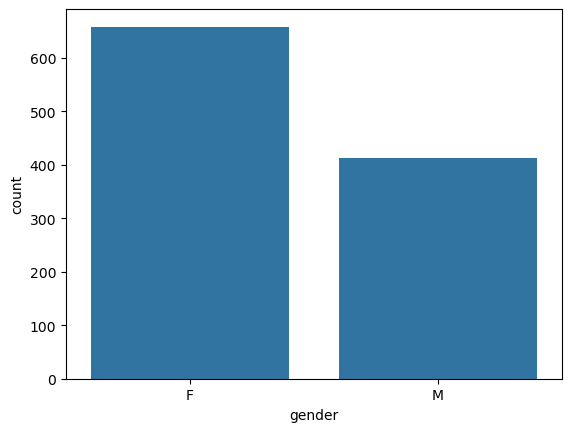

In [95]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
#%matplotlib inline

# a plot of the Gender breakdown.
sns.countplot( data=insCompany_data, x="gender")
plt.show()


In [96]:
#Insights established from these plots
#There are more Female clients than Male clients

In [97]:
insCompany_data.shape


(1071, 11)

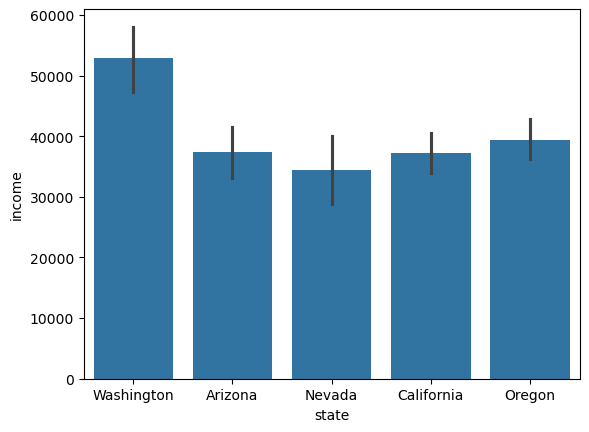

In [98]:
#  a plot of Income by State.
sns.barplot( data=insCompany_data, x="state",y="income")
plt.show()

In [99]:
#Insights established from these plots
#The clients in Washington State have the highest income averages

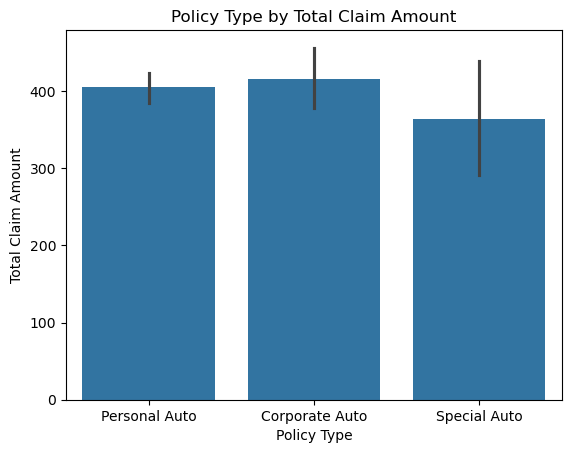

In [100]:
sns.barplot(data=insCompany_data, x='policy_type', y='total_claim_amount')
plt.title('Policy Type by Total Claim Amount')
plt.xlabel('Policy Type')
plt.ylabel('Total Claim Amount')
plt.show()

In [101]:
#Personal policies and corporate auto policy type are close
#Corporate Auto Policy Type has highest average claim amounts 

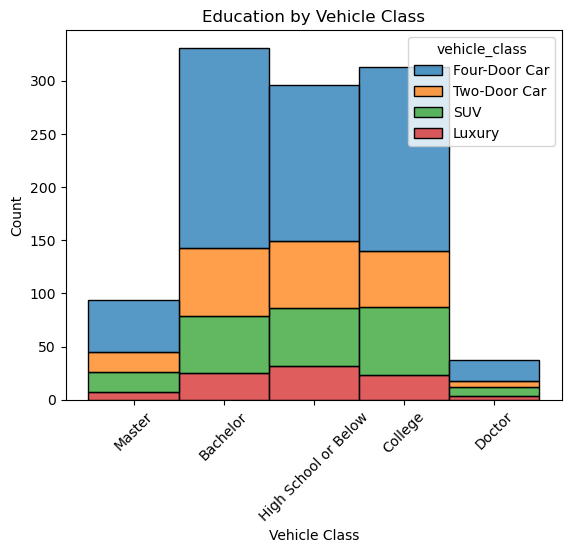

In [102]:
plot=sns.histplot(x="education", hue="vehicle_class", data=insCompany_data, stat="count", multiple="stack")
plt.title('Education by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

In [103]:
!pip install seaborn --upgrade

In [104]:
 ##Beginnning of lab round 4

In [105]:
# Get numerical columns
numerical = insCompany_data.select_dtypes(include=[np.number])

# Get categorical columns
categorical = insCompany_data.select_dtypes(include=[object])

# Print the data types of columns
print("Numerical columns:")
numerical.head()
categorical.dtypes

Numerical columns:


customer         object
state            object
gender           object
education        object
policy_type      object
vehicle_class    object
dtype: object

In [106]:

print("\nCategorical columns:")
categorical.head()


Categorical columns:


customer       state gender             education     policy_type  \
0  RB50392  Washington      F                Master   Personal Auto   
1  QZ44356     Arizona      F              Bachelor   Personal Auto   
2  AI49188      Nevada      F              Bachelor   Personal Auto   
3  WW63253  California      M              Bachelor  Corporate Auto   
4  GA49547  Washington      M  High School or Below   Personal Auto   

   vehicle_class  
0  Four-Door Car  
1  Four-Door Car  
2   Two-Door Car  
3            SUV  
4  Four-Door Car

/var/folders/q6/0l4g_6dj6t57zv_n1rh1nd040000gn/T/ipykernel_46621/3432001832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],label=column,bins=10)


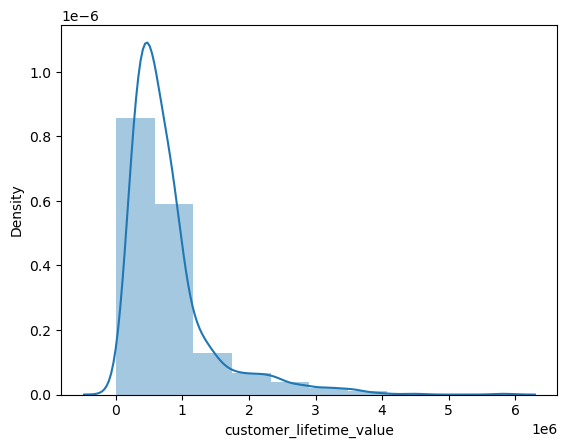

/var/folders/q6/0l4g_6dj6t57zv_n1rh1nd040000gn/T/ipykernel_46621/3432001832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],label=column,bins=10)


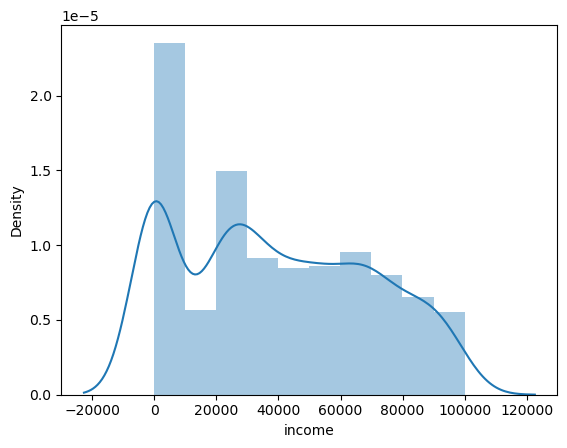

/var/folders/q6/0l4g_6dj6t57zv_n1rh1nd040000gn/T/ipykernel_46621/3432001832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],label=column,bins=10)


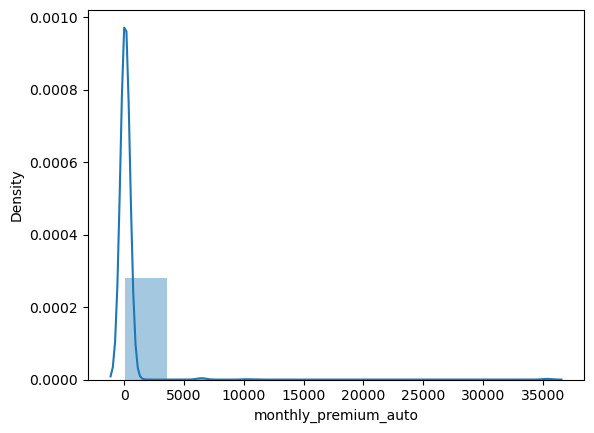

/var/folders/q6/0l4g_6dj6t57zv_n1rh1nd040000gn/T/ipykernel_46621/3432001832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],label=column,bins=10)


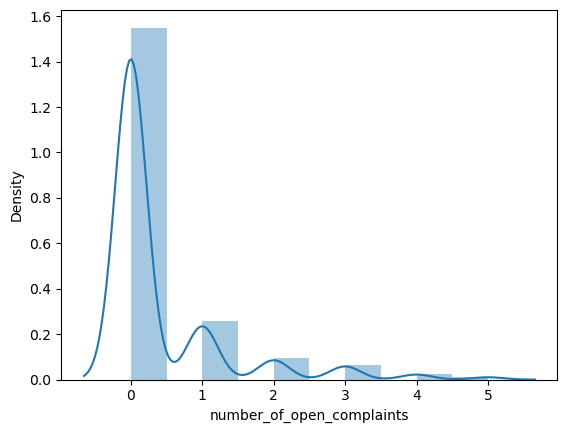

/var/folders/q6/0l4g_6dj6t57zv_n1rh1nd040000gn/T/ipykernel_46621/3432001832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],label=column,bins=10)


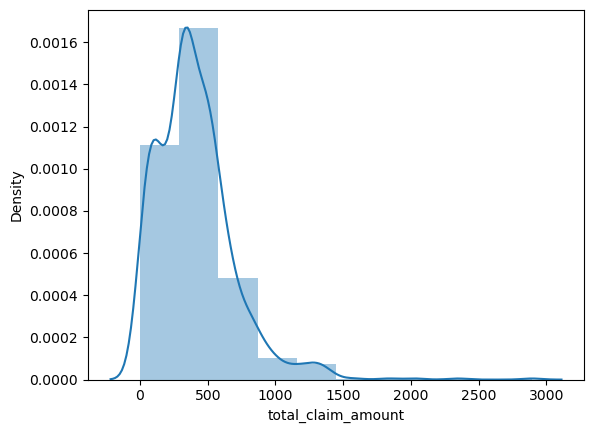

In [107]:
#seaborn library to construct distribution plots for the numerical variables

for column in numerical.columns:
    sns.distplot(numerical[column],label=column,bins=10)
    plt.show()

# sns.histplot(numerical['monthly_premium_auto'],bins=10)
# plt.show()

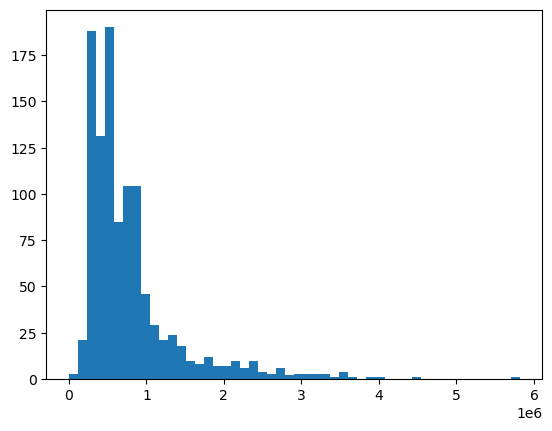

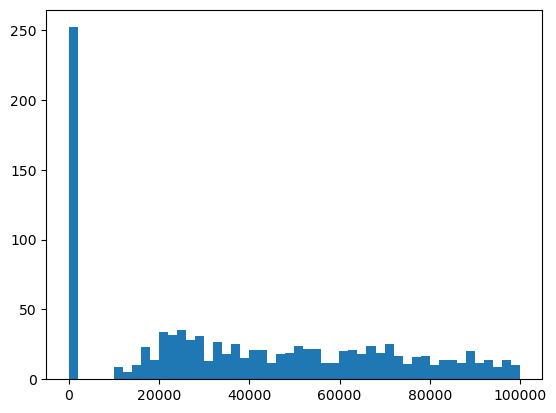

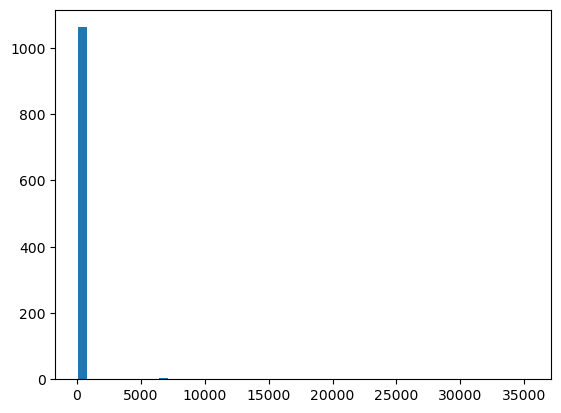

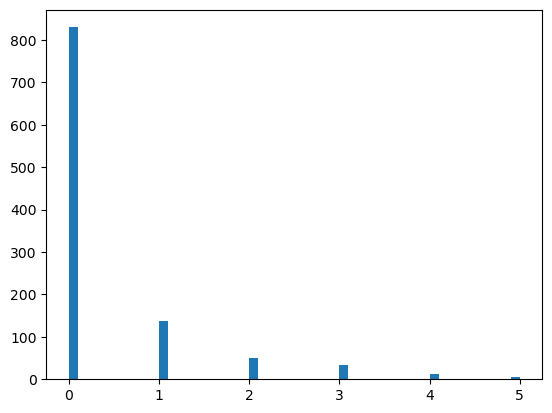

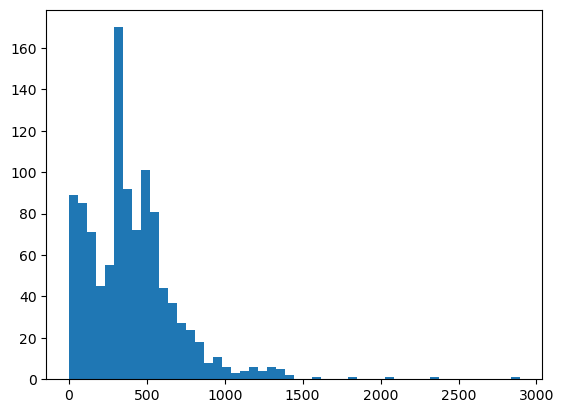

In [108]:
#Matplotlib to construct histograms

for column in numerical.columns:
    plt.hist(numerical[column],label=column,bins=50)
    plt.show()


In [109]:
#the multicollinearity between the features

In [110]:
# Calculate correlation matrix
correlation_matrix = numerical.corr()
correlation_matrix


customer_lifetime_value    income  \
customer_lifetime_value                   1.000000  0.042318   
income                                    0.042318  1.000000   
monthly_premium_auto                      0.004599  0.049100   
number_of_open_complaints                -0.026547 -0.004161   
total_claim_amount                        0.134880 -0.361282   

                           monthly_premium_auto  number_of_open_complaints  \
customer_lifetime_value                0.004599                  -0.026547   
income                                 0.049100                  -0.004161   
monthly_premium_auto                   1.000000                   0.025138   
number_of_open_complaints              0.025138                   1.000000   
total_claim_amount                    -0.040493                   0.008470   

                           total_claim_amount  
customer_lifetime_value              0.134880  
income                              -0.361282  
monthly_premium_auto                -0.040493  
number_of_open_complaints            0.008470  
total_claim_amount                   1.000000

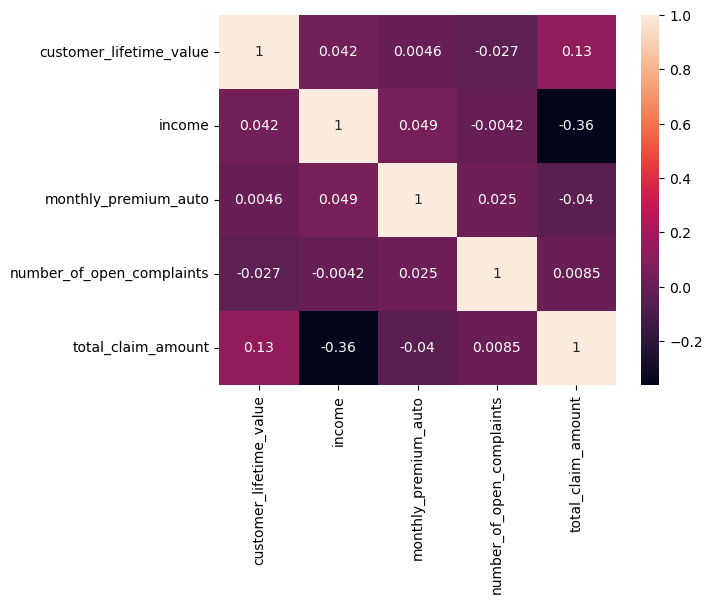

In [111]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [112]:
# we do not drop anything because there is no correlation between them.

In [113]:
#LAb Round 5

#complete data set
insCompany_data.head()

customer       state gender             education  customer_lifetime_value  \
0  RB50392  Washington      F                Master                     0.00   
1  QZ44356     Arizona      F              Bachelor                697953.59   
2  AI49188      Nevada      F              Bachelor               1288743.17   
3  WW63253  California      M              Bachelor                764586.18   
4  GA49547  Washington      M  High School or Below                536307.65   

    income  monthly_premium_auto  number_of_open_complaints     policy_type  \
0      0.0                1000.0                          0   Personal Auto   
1      0.0                  94.0                          0   Personal Auto   
2  48767.0                 108.0                          0   Personal Auto   
3      0.0                 106.0                          0  Corporate Auto   
4  36357.0                  68.0                          0   Personal Auto   

   vehicle_class  total_claim_amount  
0  Four-Door Car            2.704934  
1  Four-Door Car         1131.464935  
2   Two-Door Car          566.472247  
3            SUV          529.881344  
4  Four-Door Car           17.269323

In [114]:
#split the data set into X and Y where X has both numerical and categorial features and Y has the target that is total_claim_amount

# Remove the feature from the DataFrame and assign it to Y
Y = insCompany_data.pop('total_claim_amount')

# Perform X-Y split with the remaining features in the DataFrame
X = insCompany_data

X # excluding the target

customer       state gender             education  \
0     RB50392  Washington      F                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
1066  TM65736      Oregon      M                Master   
1067  VJ51327  California      F  High School or Below   
1068  GS98873     Arizona      F              Bachelor   
1069  CW49887  California      F                Master   
1070  MY31220  California      F               College   

      customer_lifetime_value   income  monthly_premium_auto  \
0                        0.00      0.0                1000.0   
1                   697953.59      0.0                  94.0   
2                  1288743.17  48767.0                 108.0   
3                   764586.18      0.0                 106.0   
4                   536307.65  36357.0                  68.0   
...                       ...      ...                   ...   
1066                305955.03  38644.0                  78.0   
1067               2031499.76  63209.0                 102.0   
1068                323912.47  16061.0                  88.0   
1069                462680.11  79487.0                 114.0   
1070                899704.02  54230.0                 112.0   

      number_of_open_complaints     policy_type  vehicle_class  
0                             0   Personal Auto  Four-Door Car  
1                             0   Personal Auto  Four-Door Car  
2                             0   Personal Auto   Two-Door Car  
3                             0  Corporate Auto            SUV  
4                             0   Personal Auto  Four-Door Car  
...                         ...             ...            ...  
1066                          1   Personal Auto  Four-Door Car  
1067                          2   Personal Auto            SUV  
1068                          0   Personal Auto  Four-Door Car  
1069                          0    Special Auto            SUV  
1070                          0   Personal Auto   Two-Door Car  

[1071 rows x 10 columns]

In [115]:
Y # target 

0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1066     361.455219
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
Name: total_claim_amount, Length: 1071, dtype: float64

In [116]:
# Get numerical columns
X_numerical = insCompany_data.select_dtypes(include=[np.number])

# Get categorical columns
X_categorical = insCompany_data.select_dtypes(include=[object])



In [117]:
X_numerical.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count             1.071000e+03   1071.000000           1071.000000   
mean              7.914670e+05  39295.701214            193.234360   
std               6.439447e+05  30469.427060           1601.190369   
min               0.000000e+00      0.000000             61.000000   
25%               4.019753e+05  14072.000000             68.000000   
50%               5.849322e+05  36234.000000             83.000000   
75%               8.945210e+05  64631.000000            109.500000   
max               5.816655e+06  99960.000000          35354.000000   

       number_of_open_complaints  
count                1071.000000  
mean                    0.394024  
std                     0.883769  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                     5.000000

In [118]:
X_categorical

customer       state gender             education     policy_type  \
0     RB50392  Washington      F                Master   Personal Auto   
1     QZ44356     Arizona      F              Bachelor   Personal Auto   
2     AI49188      Nevada      F              Bachelor   Personal Auto   
3     WW63253  California      M              Bachelor  Corporate Auto   
4     GA49547  Washington      M  High School or Below   Personal Auto   
...       ...         ...    ...                   ...             ...   
1066  TM65736      Oregon      M                Master   Personal Auto   
1067  VJ51327  California      F  High School or Below   Personal Auto   
1068  GS98873     Arizona      F              Bachelor   Personal Auto   
1069  CW49887  California      F                Master    Special Auto   
1070  MY31220  California      F               College   Personal Auto   

      vehicle_class  
0     Four-Door Car  
1     Four-Door Car  
2      Two-Door Car  
3               SUV  
4     Four-Door Car  
...             ...  
1066  Four-Door Car  
1067            SUV  
1068  Four-Door Car  
1069            SUV  
1070   Two-Door Car  

[1071 rows x 6 columns]

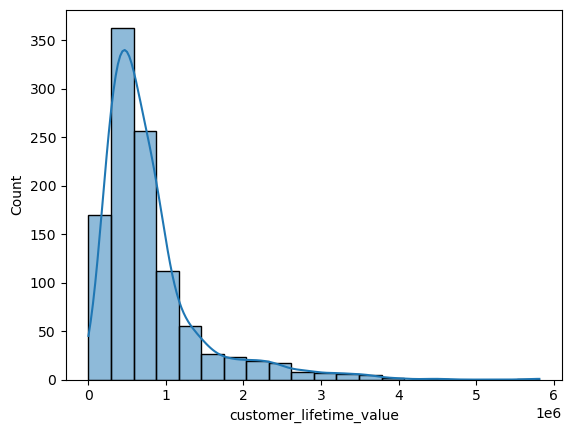

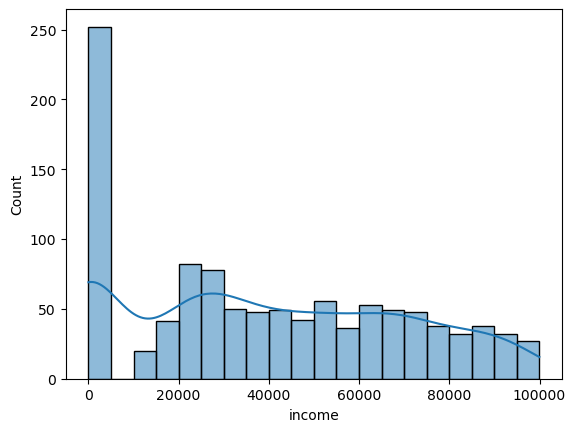

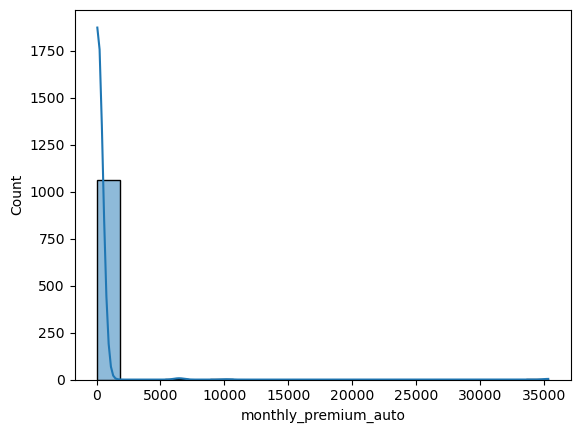

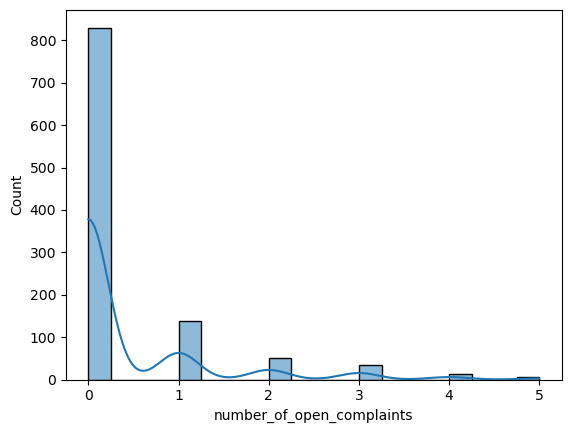

In [119]:
#scaling X numerical

for column in X_numerical.columns:
    sns.histplot(x=X_numerical[column],kde=True,bins=20)
    plt.show()

In [120]:
# Normalizing data:
transformer = MinMaxScaler().fit(X_numerical)

x_normalized = transformer.transform(X_numerical)

print(x_normalized.shape)

x_normalized

x_normalized=pd.DataFrame(x_normalized, columns=X_numerical.columns)

(1071, 4)


In [121]:
#Lab | Customer Analysis Round 6

In [122]:
# Loop through each categorical column and print its value counts

for column in X_categorical:
    print(f"Value counts for column '{column}':")
    print(X_categorical[column].value_counts())
    

Value counts for column 'customer':
customer
RB50392    1
HJ15383    1
AO74776    1
HQ82233    1
OL72737    1
          ..
RO26085    1
ES57969    1
JK55587    1
RN97635    1
MY31220    1
Name: count, Length: 1071, dtype: int64
Value counts for column 'state':
state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64
Value counts for column 'gender':
gender
F    658
M    413
Name: count, dtype: int64
Value counts for column 'education':
education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64
Value counts for column 'policy_type':
policy_type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64
Value counts for column 'vehicle_class':
vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64


In [123]:
X_categorical['customer'].value_counts()

customer
RB50392    1
HJ15383    1
AO74776    1
HQ82233    1
OL72737    1
          ..
RO26085    1
ES57969    1
JK55587    1
RN97635    1
MY31220    1
Name: count, Length: 1071, dtype: int64

In [124]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns

#drop the column customer id 
X_cat=X_categorical.drop(['customer'],axis=1)
X_cat

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)


# Get the feature names generated by the encoder
column_names = encoder.get_feature_names_out()
display(column_names)


encoded = encoder.transform(X_cat).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=column_names)
onehot_encoded.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]


array(['state_California', 'state_Nevada', 'state_Oregon',
       'state_Washington', 'gender_M', 'education_College',
       'education_Doctor', 'education_High School or Below',
       'education_Master', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'vehicle_class_Luxury',
       'vehicle_class_SUV', 'vehicle_class_Two-Door Car'], dtype=object)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


state_California  state_Nevada  state_Oregon  state_Washington  gender_M  \
0                0.0           0.0           0.0               1.0       0.0   
1                0.0           0.0           0.0               0.0       0.0   
2                0.0           1.0           0.0               0.0       0.0   
3                1.0           0.0           0.0               0.0       1.0   
4                0.0           0.0           0.0               1.0       1.0   
5                0.0           0.0           1.0               0.0       0.0   
6                0.0           0.0           1.0               0.0       0.0   
7                0.0           0.0           0.0               0.0       1.0   
8                0.0           0.0           1.0               0.0       1.0   
9                0.0           0.0           1.0               0.0       0.0   
10               1.0           0.0           0.0               0.0       1.0   
11               1.0           0.0           0.0               0.0       0.0   
12               1.0           0.0           0.0               0.0       0.0   
13               0.0           0.0           0.0               0.0       0.0   
14               1.0           0.0           0.0               0.0       0.0   
15               0.0           0.0           1.0               0.0       0.0   
16               0.0           1.0           0.0               0.0       0.0   
17               1.0           0.0           0.0               0.0       0.0   
18               0.0           0.0           1.0               0.0       0.0   
19               1.0           0.0           0.0               0.0       0.0   

    education_College  education_Doctor  education_High School or Below  \
0                 0.0               0.0                             0.0   
1                 0.0               0.0                             0.0   
2                 0.0               0.0                             0.0   
3                 0.0               0.0                             0.0   
4                 0.0               0.0                             1.0   
5                 0.0               0.0                             0.0   
6                 1.0               0.0                             0.0   
7                 0.0               0.0                             0.0   
8                 0.0               0.0                             0.0   
9                 1.0               0.0                             0.0   
10                1.0               0.0                             0.0   
11                1.0               0.0                             0.0   
12                0.0               0.0                             0.0   
13                0.0               0.0                             1.0   
14                1.0               0.0                             0.0   
15                0.0               0.0                             0.0   
16                0.0               0.0                             1.0   
17                1.0               0.0                             0.0   
18                1.0               0.0                             0.0   
19                0.0               0.0                             1.0   

    education_Master  policy_type_Personal Auto  policy_type_Special Auto  \
0                1.0                        1.0                       0.0   
1                0.0                        1.0                       0.0   
2                0.0                        1.0                       0.0   
3                0.0                        0.0                       0.0   
4                0.0                        1.0                       0.0   
5                0.0                        1.0                       0.0   
6                0.0                        0.0                       0.0   
7                1.0                        0.0                       0.0   
8                0.0                        0.0       

In [125]:
#merging all this information together into a single dataset with all features
X = pd.concat([x_normalized, onehot_encoded], axis=1) 
X.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.000000  0.000000              0.026606   
1                 0.119992  0.000000              0.000935   
2                 0.221561  0.487865              0.001332   
3                 0.131448  0.000000              0.001275   
4                 0.092202  0.363715              0.000198   

   number_of_open_complaints  state_California  state_Nevada  state_Oregon  \
0                        0.0               0.0           0.0           0.0   
1                        0.0               0.0           0.0           0.0   
2                        0.0               0.0           1.0           0.0   
3                        0.0               1.0           0.0           0.0   
4                        0.0               0.0           0.0           0.0   

   state_Washington  gender_M  education_College  education_Doctor  \
0               1.0       0.0                0.0               0.0   
1               0.0       0.0                0.0               0.0   
2               0.0       0.0                0.0               0.0   
3               0.0       1.0                0.0               0.0   
4               1.0       1.0                0.0               0.0   

   education_High School or Below  education_Master  \
0                             0.0               1.0   
1                             0.0               0.0   
2                             0.0               0.0   
3                             0.0               0.0   
4                             1.0               0.0   

   policy_type_Personal Auto  policy_type_Special Auto  vehicle_class_Luxury  \
0                        1.0                       0.0                   0.0   
1                        1.0                       0.0                   0.0   
2                        1.0                       0.0                   0.0   
3                        0.0                       0.0                   0.0   
4                        1.0                       0.0                   0.0   

   vehicle_class_SUV  vehicle_class_Two-Door Car  
0                0.0                         0.0  
1                0.0                         0.0  
2                0.0                         1.0  
3                1.0                         0.0  
4                0.0                         0.0

In [126]:

Y.head()#target

0       2.704934
1    1131.464935
2     566.472247
3     529.881344
4      17.269323
Name: total_claim_amount, dtype: float64

In [135]:
#Train-test split.
# import library
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, Y, test_size=.2)

In [136]:
X_train.head()

customer_lifetime_value    income  monthly_premium_auto  \
140                  0.042466  0.000000              0.000368   
1033                 0.084875  0.000000              0.000312   
547                  0.137467  0.934964              0.001077   
620                  0.042507  0.638856              0.000028   
691                  0.135043  0.253882              0.000142   

      number_of_open_complaints  state_California  state_Nevada  state_Oregon  \
140                         0.0               0.0           0.0           1.0   
1033                        0.4               0.0           0.0           1.0   
547                         0.0               0.0           0.0           0.0   
620                         0.0               0.0           0.0           1.0   
691                         0.2               0.0           0.0           0.0   

      state_Washington  gender_M  education_College  education_Doctor  \
140                0.0       1.0                1.0               0.0   
1033               0.0       0.0                1.0               0.0   
547                0.0       1.0                1.0               0.0   
620                0.0       0.0                1.0               0.0   
691                0.0       1.0                1.0               0.0   

      education_High School or Below  education_Master  \
140                              0.0               0.0   
1033                             0.0               0.0   
547                              0.0               0.0   
620                              0.0               0.0   
691                              0.0               0.0   

      policy_type_Personal Auto  policy_type_Special Auto  \
140                         1.0                       0.0   
1033                        1.0                       0.0   
547                         1.0                       0.0   
620                         1.0                       0.0   
691                         1.0                       0.0   

      vehicle_class_Luxury  vehicle_class_SUV  vehicle_class_Two-Door Car  
140                    0.0                0.0                         1.0  
1033                   0.0                0.0                         1.0  
547                    0.0                0.0                         0.0  
620                    0.0                0.0                         0.0  
691                    0.0                0.0                         0.0

In [130]:
y_train.head()

1010      7.345946
688      74.523935
243     566.935022
948     470.400000
798     425.266308
Name: total_claim_amount, dtype: float64

In [137]:
# linear Regression

#import library
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

In [132]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.30946510955832984

In [153]:
#Evaluating our model
# from sklearn.metrics import mean_squared_error 

# #Mean Squared Error

mse=mean_squared_error(y_test,predictions_test)
mse

# #Root Mean Squared Error.

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(round(rmse))



239


In [157]:
from sklearn.metrics import mean_absolute_error, r2_score

#Validation R2 scores
r2 = r2_score(y_test, predictions_test)
print(r2)

0.3267037496864367


In [174]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

156.23721141442184


In [ ]:
#Lab | Customer Analysis Round 7

In [ ]:
#correlation_matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [145]:
#here dropping the most insignificant variable that is number of open complaints
# Get numerical columns
new_Data = insCompany_data.select_dtypes(include=[np.number])
new_Data_Numerical = new_Data.drop(['number_of_open_complaints'], axis=1)
new_Data_Numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto'], dtype='object')

In [146]:
# scaling standard scaler: make data distributed with mean=0 and std=1
transformer = StandardScaler().fit(new_Data_Numerical)

x_standardized = transformer.transform(new_Data_Numerical)
print(x_standardized.shape)
x_standardized=pd.DataFrame(x_standardized, columns=new_Data_Numerical.columns)

(1071, 3)


In [164]:
#merging all this information together into a single dataset with all features
X1 = pd.concat([x_standardized, onehot_encoded], axis=1) 
X1.head()

customer_lifetime_value    income  monthly_premium_auto  state_California  \
0                -1.229666 -1.290279              0.504089               0.0   
1                -0.145288 -1.290279             -0.062004               0.0   
2                 0.772595  0.310991             -0.053257               0.0   
3                -0.041764 -1.290279             -0.054506               1.0   
4                -0.396429 -0.096493             -0.078250               0.0   

   state_Nevada  state_Oregon  state_Washington  gender_M  education_College  \
0           0.0           0.0               1.0       0.0                0.0   
1           0.0           0.0               0.0       0.0                0.0   
2           1.0           0.0               0.0       0.0                0.0   
3           0.0           0.0               0.0       1.0                0.0   
4           0.0           0.0               1.0       1.0                0.0   

   education_Doctor  education_High School or Below  education_Master  \
0               0.0                             0.0               1.0   
1               0.0                             0.0               0.0   
2               0.0                             0.0               0.0   
3               0.0                             0.0               0.0   
4               0.0                             1.0               0.0   

   policy_type_Personal Auto  policy_type_Special Auto  vehicle_class_Luxury  \
0                        1.0                       0.0                   0.0   
1                        1.0                       0.0                   0.0   
2                        1.0                       0.0                   0.0   
3                        0.0                       0.0                   0.0   
4                        1.0                       0.0                   0.0   

   vehicle_class_SUV  vehicle_class_Two-Door Car  
0                0.0                         0.0  
1                0.0                         0.0  
2                0.0                         1.0  
3                1.0                         0.0  
4                0.0                         0.0

In [166]:
#Train-test split with taking 70 % and 30 % test plit ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y, test_size=0.3)

In [167]:
X_train.head()

customer_lifetime_value    income  monthly_premium_auto  \
108                -0.308544  0.040561             -0.074501   
387                -0.269024 -0.511693             -0.067628   
228                 0.117136 -0.585178             -0.049508   
245                -0.730777 -0.756084             -0.067003   
327                -0.830819  0.051495             -0.080124   

     state_California  state_Nevada  state_Oregon  state_Washington  gender_M  \
108               1.0           0.0           0.0               0.0       0.0   
387               0.0           0.0           1.0               0.0       1.0   
228               0.0           0.0           0.0               0.0       1.0   
245               1.0           0.0           0.0               0.0       1.0   
327               0.0           1.0           0.0               0.0       0.0   

     education_College  education_Doctor  education_High School or Below  \
108                0.0               0.0                             0.0   
387                0.0               0.0                             0.0   
228                0.0               0.0                             1.0   
245                0.0               0.0                             0.0   
327                0.0               0.0                             0.0   

     education_Master  policy_type_Personal Auto  policy_type_Special Auto  \
108               0.0                        1.0                       0.0   
387               0.0                        1.0                       0.0   
228               0.0                        0.0                       0.0   
245               0.0                        0.0                       0.0   
327               0.0                        0.0                       0.0   

     vehicle_class_Luxury  vehicle_class_SUV  vehicle_class_Two-Door Car  
108                   0.0                0.0                         1.0  
387                   0.0                0.0                         0.0  
228                   0.0                1.0                         0.0  
245                   0.0                0.0                         1.0  
327                   0.0                0.0                         0.0

In [168]:
# linear Regression
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [169]:
y_train.head()

108     30.567357
387    376.126419
228    373.428187
245    412.800000
327      9.515280
Name: total_claim_amount, dtype: float64

In [171]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.39052025866927054

In [172]:


#Evaluating our model

#Mean Squared Error
mse=mean_squared_error(y_test,predictions_test)
print(round(mse))

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(round(rmse))



42494
206


In [173]:
from sklearn.metrics import mean_absolute_error, r2_score

#Validation R2 scores.
r2 = r2_score(y_test, predictions_test)
print(r2)

0.39052025866927054


In [175]:
#Mean Absolute Error

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

156.23721141442184
